In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Overall engagement rate

In [14]:
overall_engagement_rate = df.groupby('Response').count()['Customer']/df.shape[0]
overall_engagement_rate

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

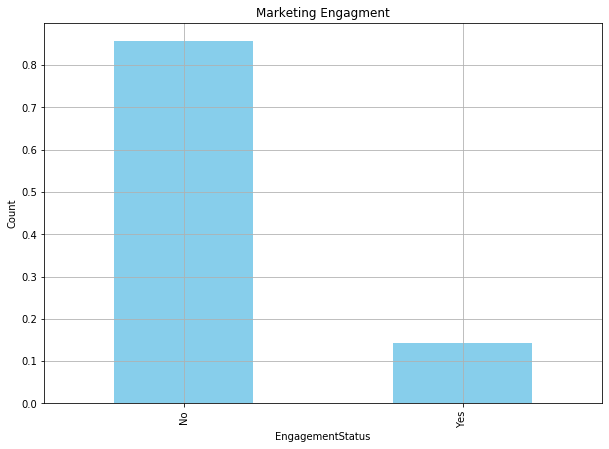

In [15]:
ax = overall_engagement_rate.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment'
)

ax.set_xlabel('EngagementStatus')
ax.set_ylabel('Count')

plt.show()

# Engagement rates by offer type

In [16]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

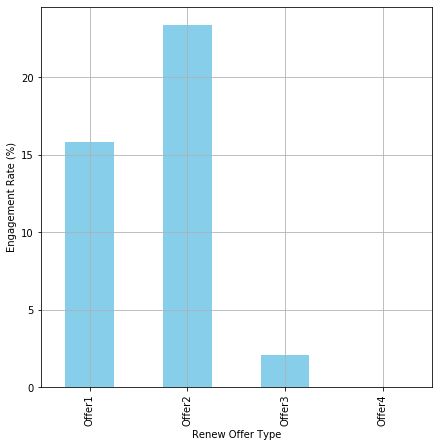

In [17]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

<font color=black size=5>*Offer2 had the highest engagement rate among the customers.*</font>


# Engagement rates by offer type and vehicle class

In [19]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [24]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


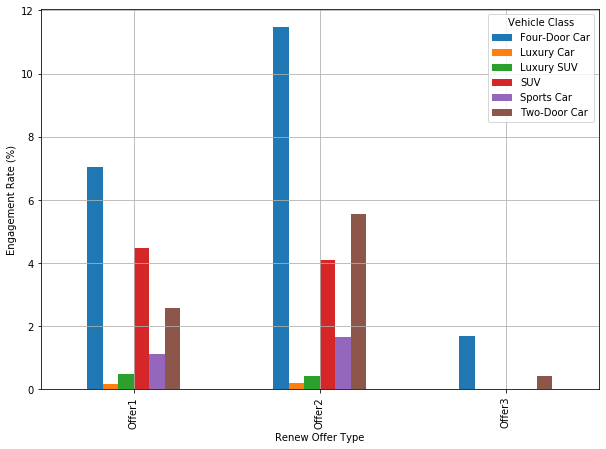

In [25]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

<font color=black size=5>*Offer2 had the highest response rate among the customers in the previous section. customers with Four-Door Car respond the most frequently for all offer types. However, customers with SUV respond with a higher chance to Offer1 than to Offer2.*</font>


# Engagement rates by sales channel

In [27]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

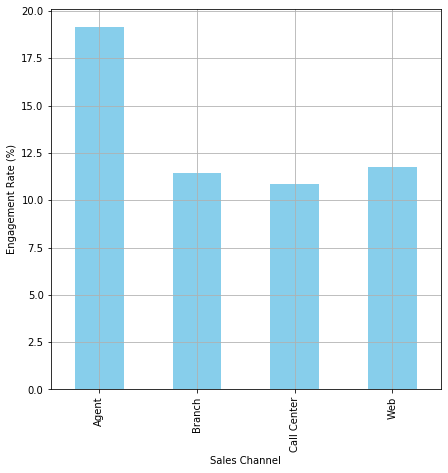

In [28]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

<font color=black size=5>*Agent works the best in terms of getting responses from the customers. Then, sales through Web works the second best.*</font>



# Engagement rates by sales channel and vehicle size

In [29]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [30]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


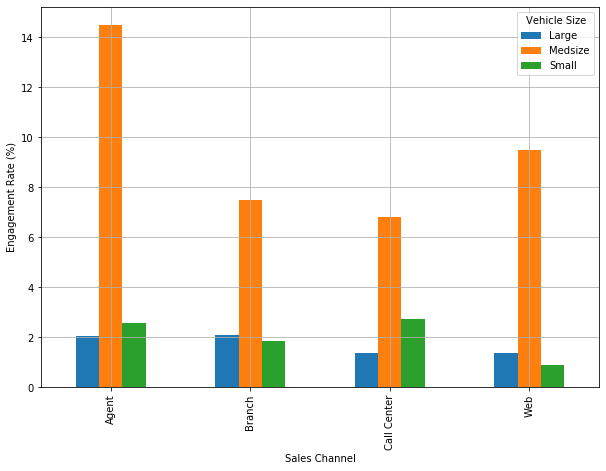

In [31]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

 <font color=black size=5>*customers with Medsize vehicles respond the best to all sales channels. The engagement rates across different sales channels differ slightly between Large and Small vehicle owners.*</font>


